In [1]:
#Checking present working directory
pwd

u'C:\\Users\\akumar'

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15, 6

In [5]:
#loading the data set and look at some initial rows and data types of the columns
data = pd.read_csv('AirPassengers.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [9]:
#Reading the data as a time series
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print data.head()

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [10]:
#Cross-check the datatype of the index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [12]:
#Converting the column into a Series object to prevent referring to columns names every time
ts = data['#Passengers']

In [13]:
#Checking few obs
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [14]:
#Indexing techniques for TS data
#1. Specific the index as a string constant:
ts['1949-01-01']

112

In [15]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [16]:
#If want all the data upto May 1949
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [17]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [18]:
#If need all the values of the year 1949
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

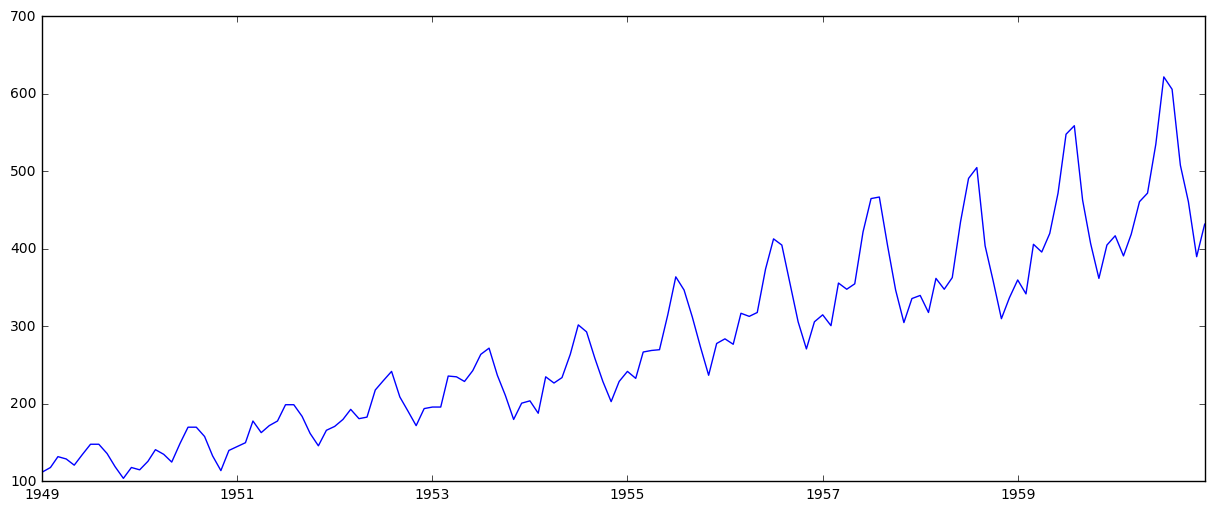

In [64]:
#Checking Stationarity of a Time Series
#Plotting the data and analyze visually
plt.plot(ts)
plt.savefig('TS.jpeg', bbox_inches='tight')

In [22]:
#Back to checking stationarity, using the rolling statistics plots along with Dickey-Fuller test results a lot 
#defining a function which takes a TS as input and generated them for us
#Plotting standard deviation instead of variance to keep the unit similar to mean
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing Rolling Statistics
    rolmean = pd.rolling_mean(timeseries,window=12)
    rolstd = pd.rolling_std(timeseries,window=12)
    
    #Plot Rolling Statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Numbers of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


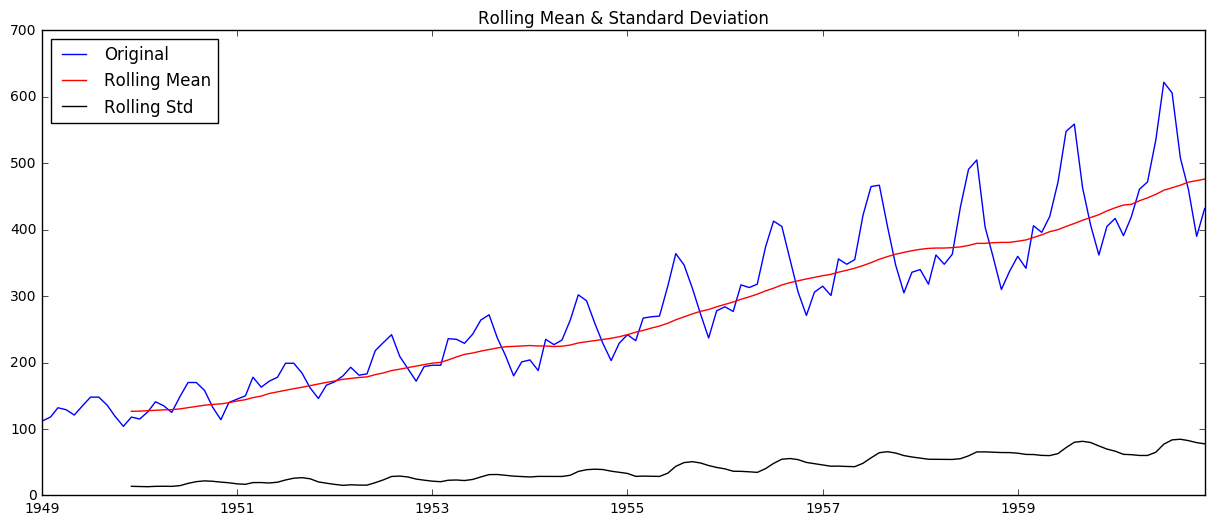

Results of Dickey-Fuller Test:
Test Statistic                    0.815369
p-value                           0.991880
#Lags Used                       13.000000
Numbers of Observations Used    130.000000
Critical Value (5%)              -2.884042
Critical Value (1%)              -3.481682
Critical Value (10%)             -2.578770
dtype: float64


In [23]:
#Running it for input series:
test_stationarity(ts)

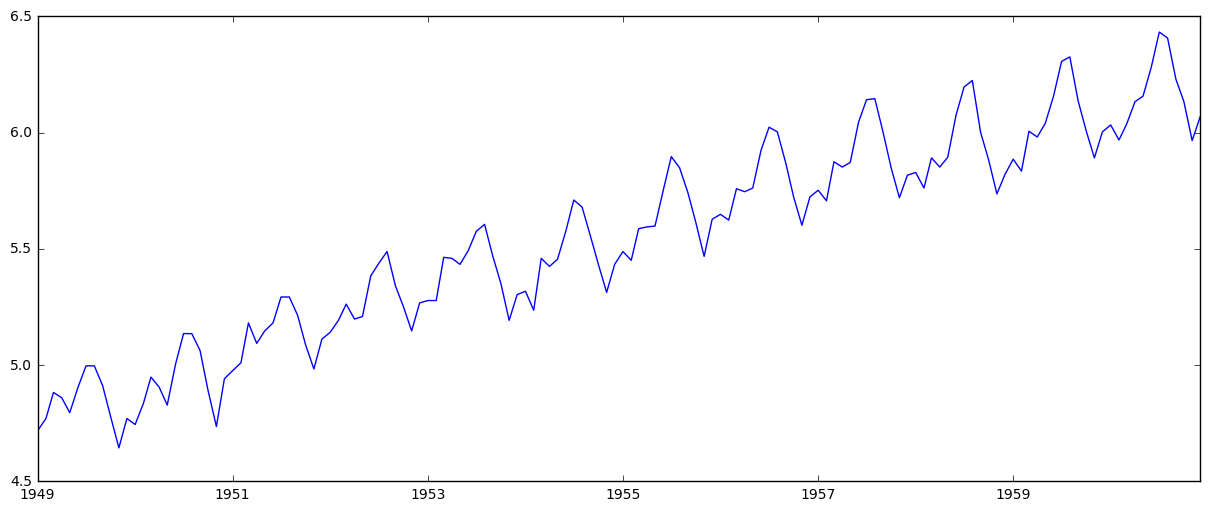

In [25]:
#Estimating & Eliminating Trend
#Log Transformation for penalizing higher values more than smaller values
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app


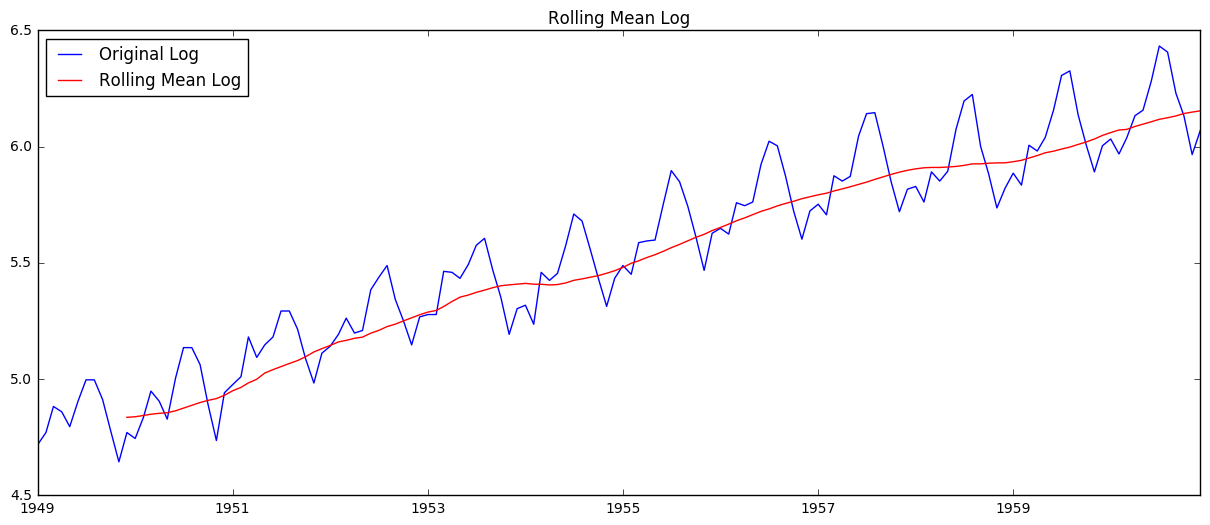

In [30]:
#Moving Average: Taking average of ‘k’ consecutive values depending on the frequency of time series
#Currently taking Avg over the past 12 months
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log, label='Original Log')
plt.plot(moving_avg, color='red', label='Rolling Mean Log')
plt.legend(loc='best')
plt.title('Rolling Mean Log')
plt.show(block=False) #this creates an empty frozen window, to override the blocking behaviour

In [31]:
#Substracting rolling mean from the original series
#Since we are taking average of last 12 values, rolling mean is not defined for first 11 values
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


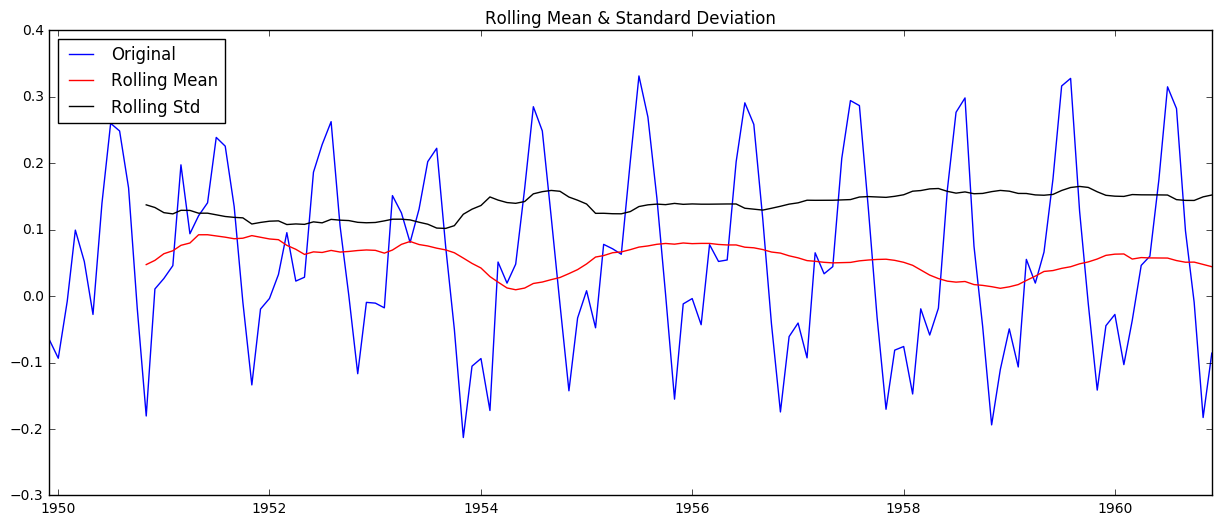

Results of Dickey-Fuller Test:
Test Statistic                   -3.162908
p-value                           0.022235
#Lags Used                       13.000000
Numbers of Observations Used    119.000000
Critical Value (5%)              -2.886151
Critical Value (1%)              -3.486535
Critical Value (10%)             -2.579896
dtype: float64


In [32]:
#Dropping NaN values and checking the plots to test stationarity
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  from ipykernel import kernelapp as app


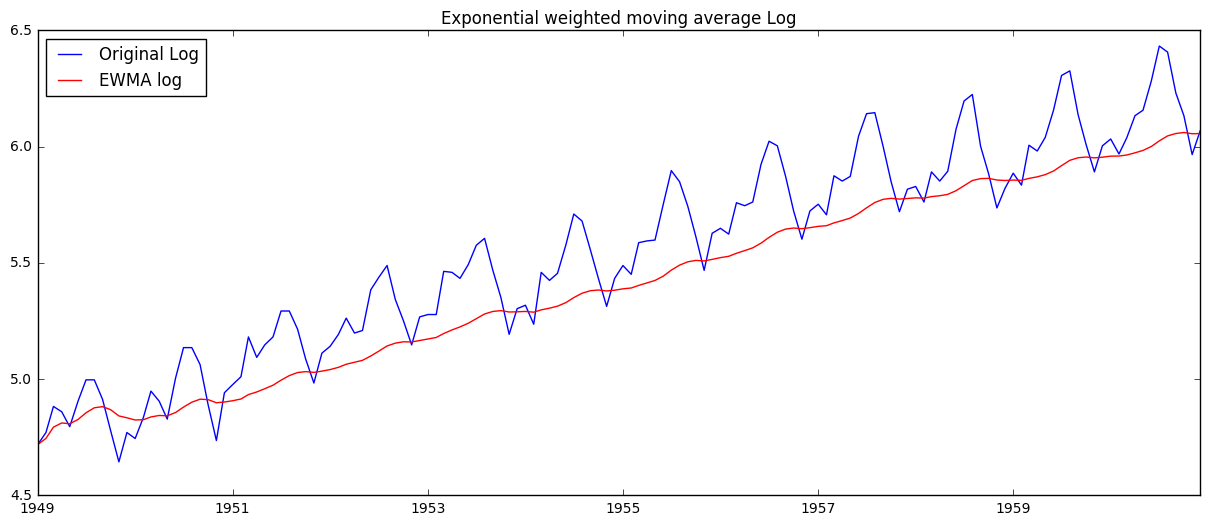

In [34]:
#Exponentially weighted moving average approach where weights are assigned to all the previous values with a decay factor
#Parameter ‘halflife’ is used to define the amount of exponential decay
expweighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log, label='Original Log')
plt.plot(expweighted_avg, color='red', label='EWMA log')
plt.legend(loc='best')
plt.title('Exponential weighted moving average Log')
plt.show(block=False)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


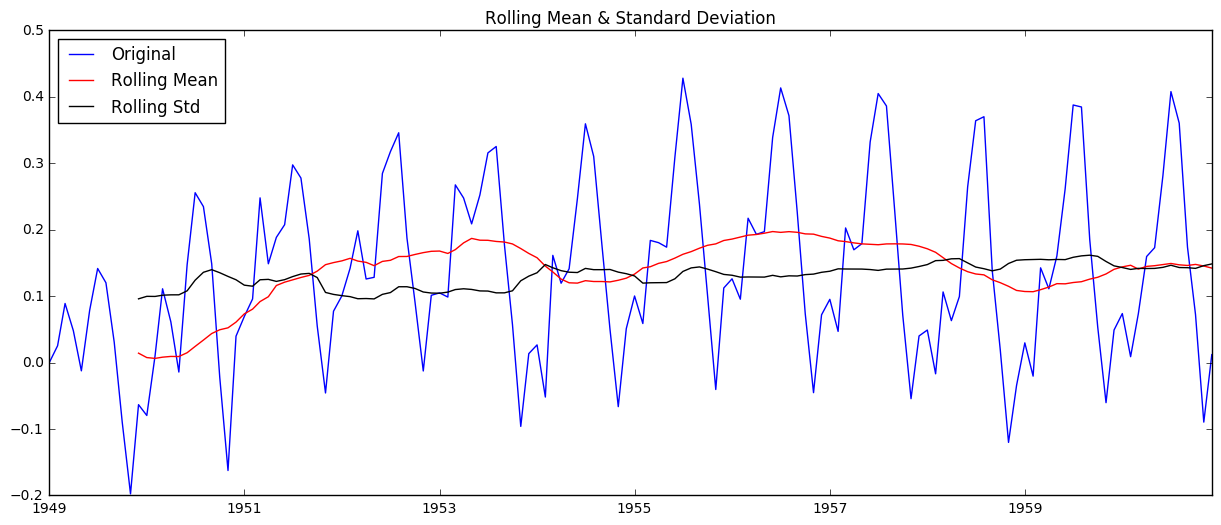

Results of Dickey-Fuller Test:
Test Statistic                   -3.601262
p-value                           0.005737
#Lags Used                       13.000000
Numbers of Observations Used    130.000000
Critical Value (5%)              -2.884042
Critical Value (1%)              -3.481682
Critical Value (10%)             -2.578770
dtype: float64


In [35]:
#Substracting exponentially weighted moving average from the original log series and checking stationarity
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

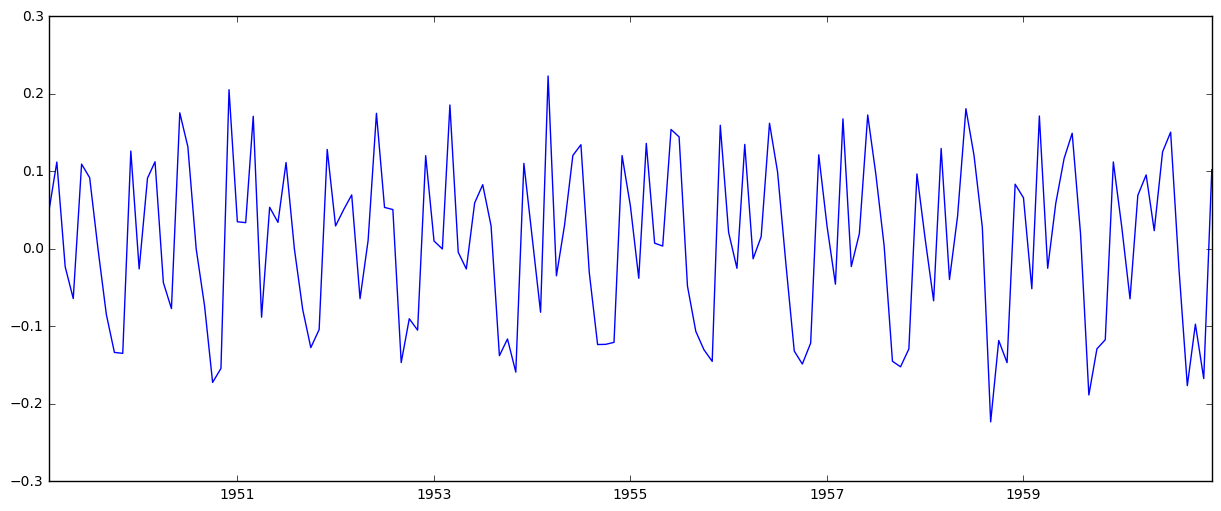

In [36]:
#Eliminating Trend and Seasonality: 
#1. First Order Differencing-taking the difference with a particular time lag
#Taking the difference of the observation at a particular instant with that at the previous instant
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


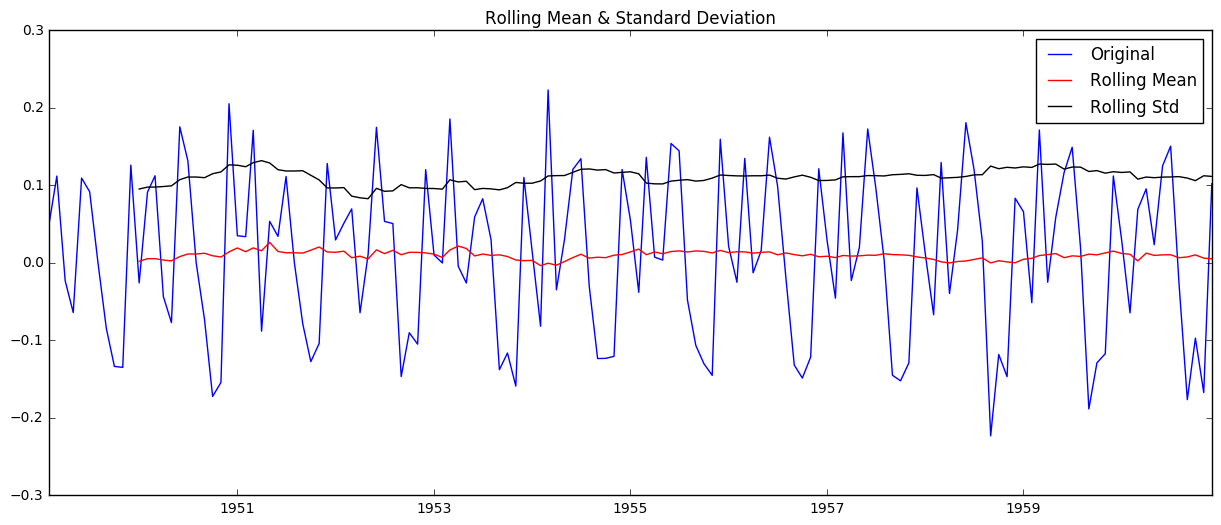

Results of Dickey-Fuller Test:
Test Statistic                   -2.717131
p-value                           0.071121
#Lags Used                       14.000000
Numbers of Observations Used    128.000000
Critical Value (5%)              -2.884398
Critical Value (1%)              -3.482501
Critical Value (10%)             -2.578960
dtype: float64


In [37]:
#Appears to have reduced trend considerably, Verfifying using the plots
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

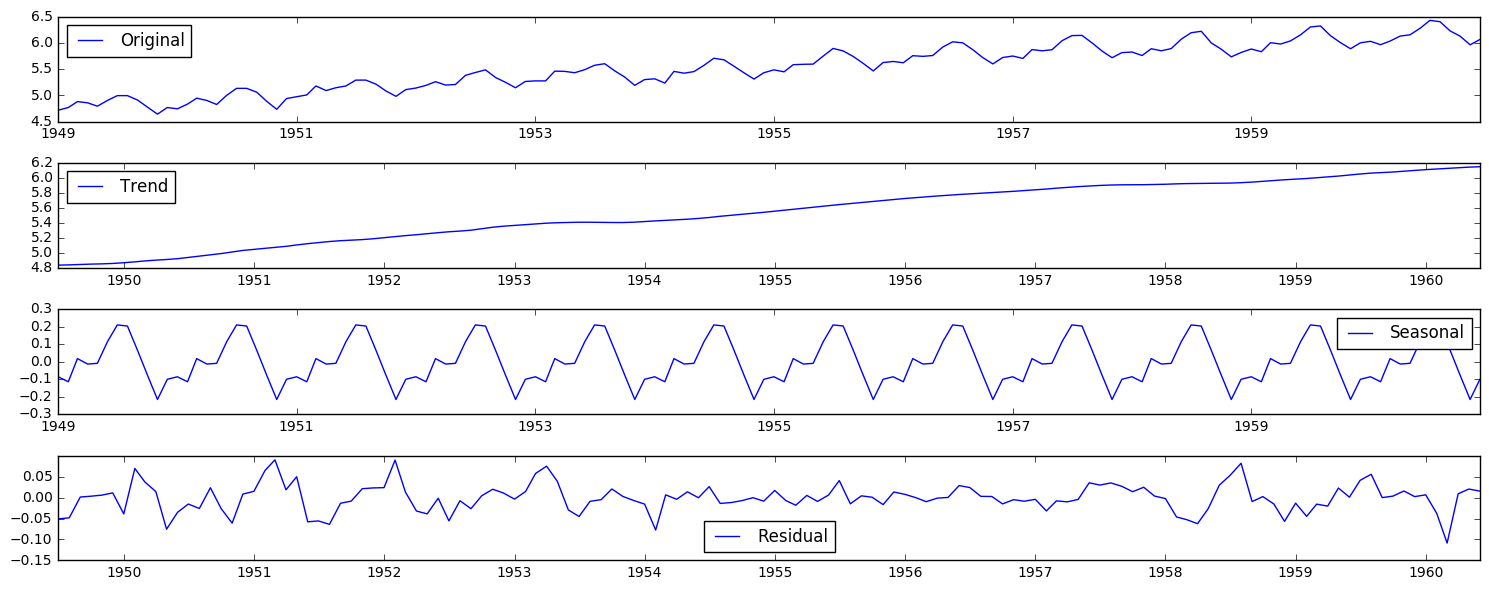

In [65]:
#Eliminating Trend and Seasonality:
#2. Decomposition - Modeling both trend and seasonality and removing them from the model
#Both trend and seasonality are modeled separately and the remaining part of the series is returned
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


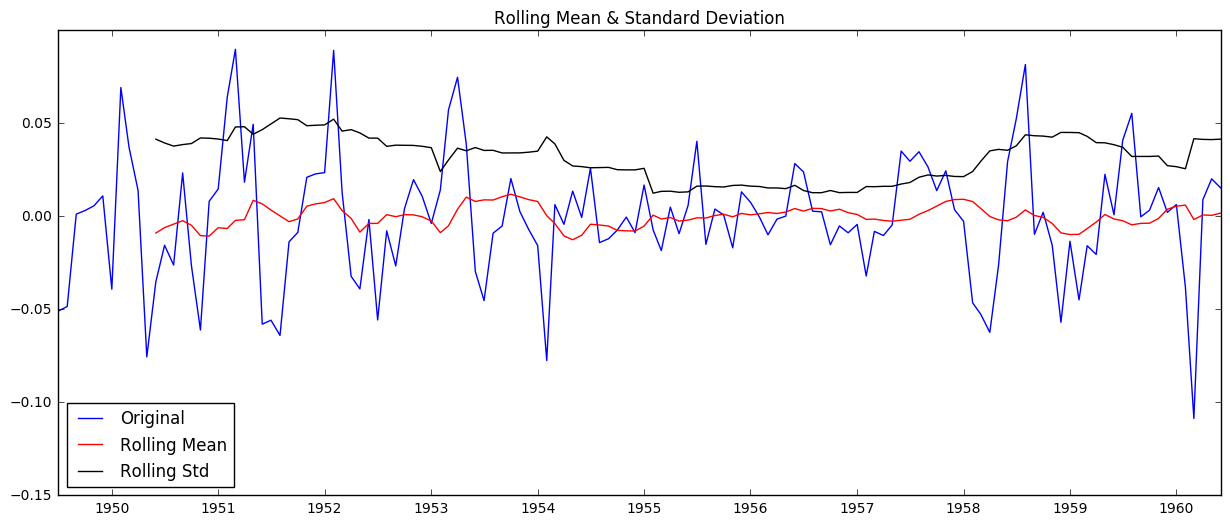

Results of Dickey-Fuller Test:
Test Statistic                 -6.332387e+00
p-value                         2.885059e-08
#Lags Used                      9.000000e+00
Numbers of Observations Used    1.220000e+02
Critical Value (5%)            -2.885538e+00
Critical Value (1%)            -3.485122e+00
Critical Value (10%)           -2.579569e+00
dtype: float64


In [82]:
#Checking stationarity of residuals
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

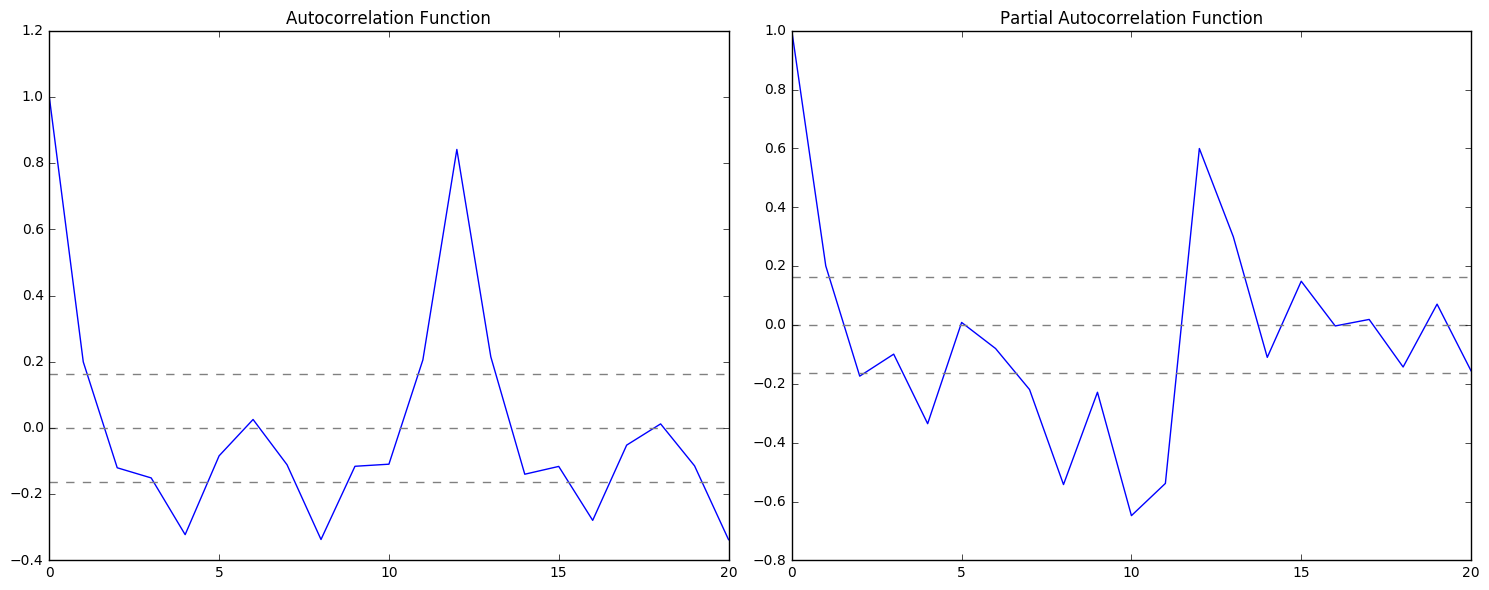

In [62]:
#Forecasting a Time Series
#Autocorrelation function and Partial autocorrelation function plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plotting ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plotting PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.
RSS is for the values of residuals and not actual series.

In [46]:
#Loading ARIMA model
from statsmodels.tsa.arima_model import ARIMA

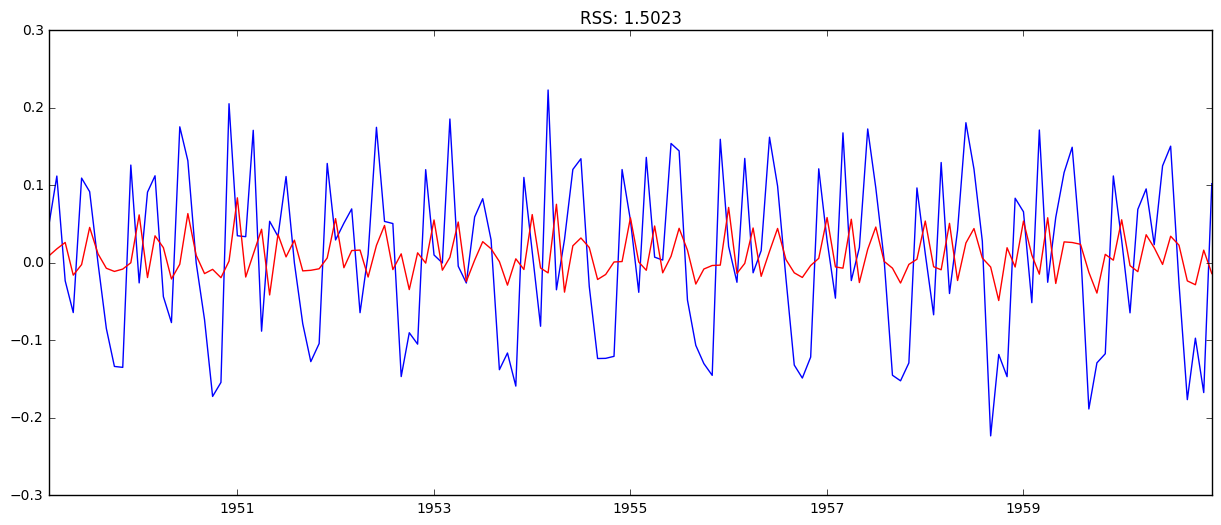

In [47]:
#AR Model
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

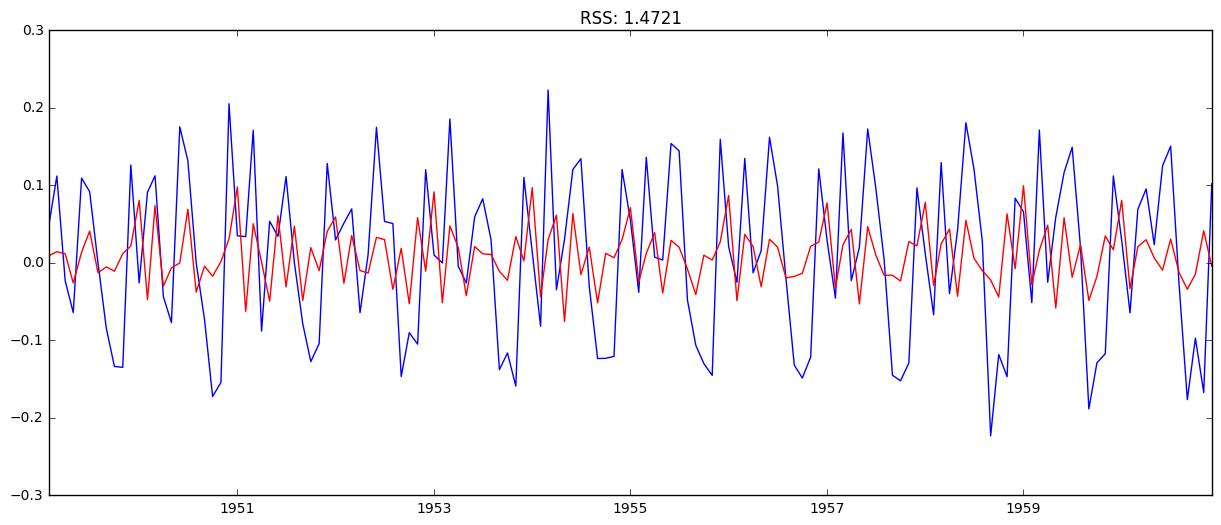

In [48]:
#MA Model
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

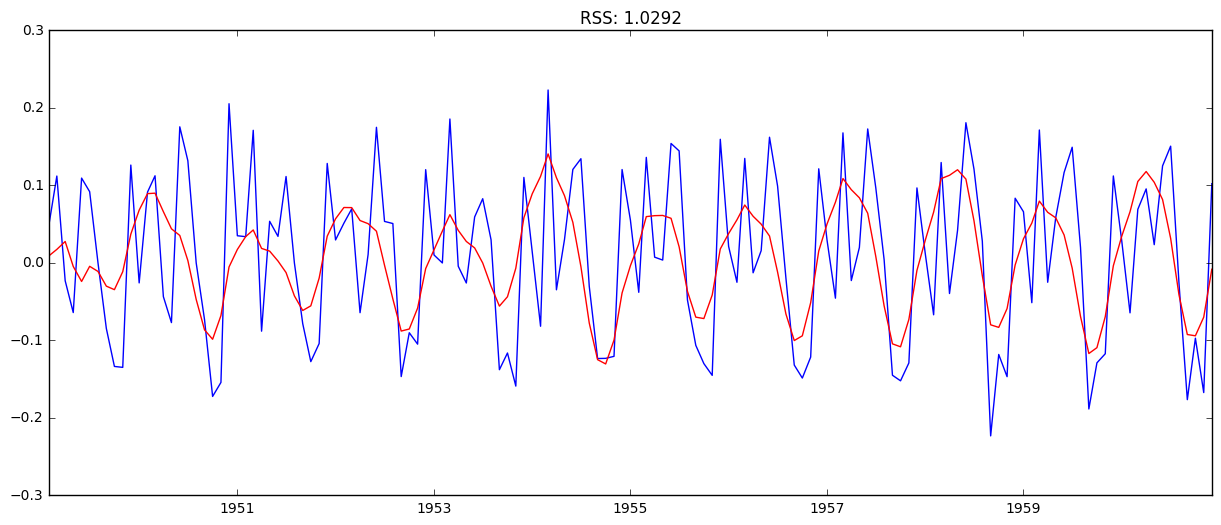

In [49]:
#Combined Model
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

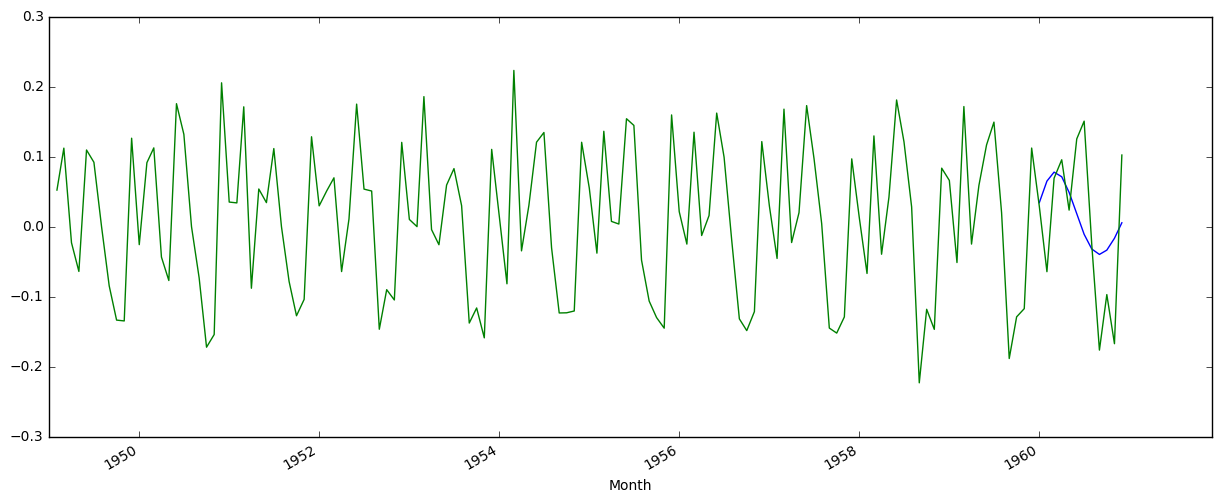

In [81]:
#Using the model to forecast for time periods that already have data for, to understand how accurate are the forecasts
data['forecast'] = results_ARIMA.predict(start = '1960-01-01', end= '1960-12-01', dynamic= True)  
#data[['riders', 'forecast']].plot(figsize=(12, 8))
data['forecast'].plot()
ts_log_diff.plot()
#plt.savefig('ts_df_predict.png', bbox_inches='tight')

In [78]:
#Adding the new time periods to the dataframe
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("1961-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= data.columns)
data = pd.concat([data, future])

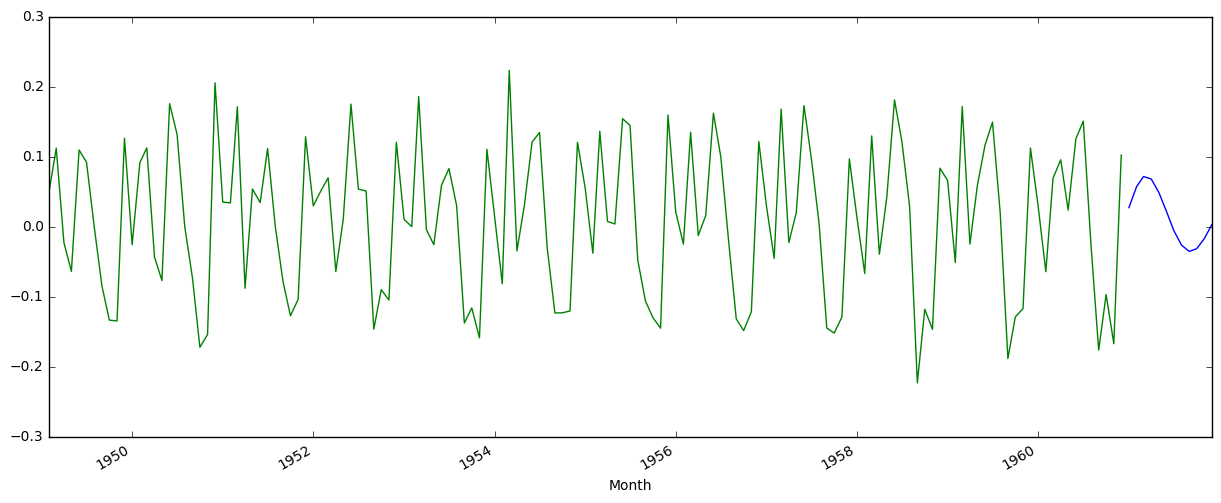

In [83]:
#Using the predict function to create forecast values for these newly added time periods and plot them
data['forecast'] = results_ARIMA.predict(start = '1961-01-01', end = '1961-12-01', dynamic= True)  
data['forecast'].ix[-24:].plot()
ts_log_diff.plot()     
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

In [51]:
#Scaling back to the original values
#1. Storing the predicted results as a seperate series and observing it
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy='TRUE')
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [52]:
#2. Determining the cumulative sum at index
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [56]:
#3. Creating a series with all values as base number and add the differences to it
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

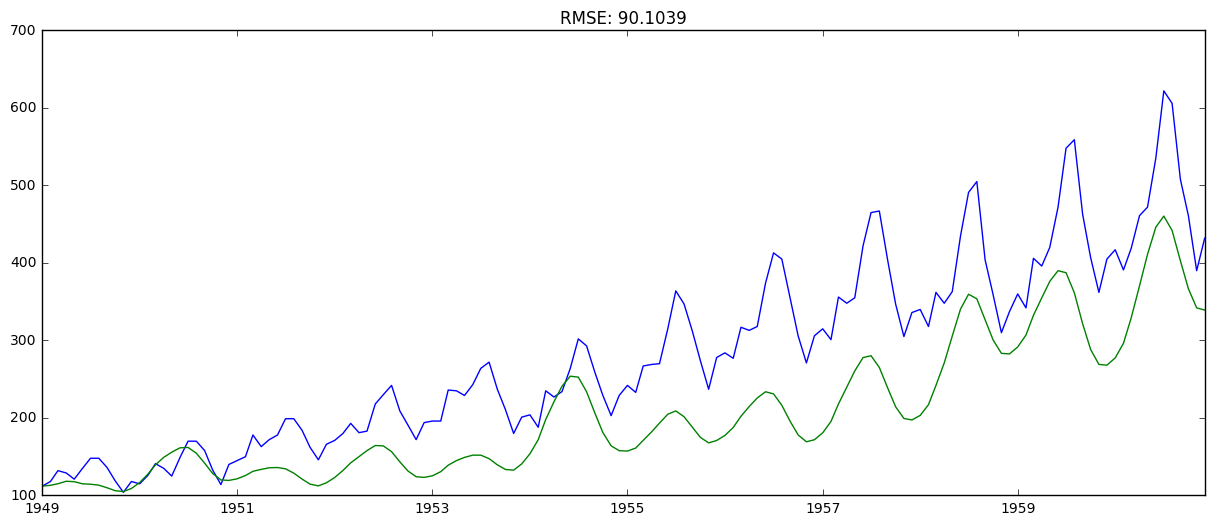

In [58]:
#4. Taking the exponent and compare with the original series
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [61]:
#Checking last observations
predictions_ARIMA.tail(10)

Month
1960-03-01    329.214313
1960-04-01    370.430504
1960-05-01    411.052096
1960-06-01    446.087613
1960-07-01    460.463195
1960-08-01    441.888165
1960-09-01    402.907422
1960-10-01    366.754818
1960-11-01    341.985997
1960-12-01    339.217981
dtype: float64